In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import EPPE_Simulator as eppe
import astropy.constants as const

In [2]:
expTime = 5
intTime = 127.66*24.

randomOrientation = False
albedo = 0.1#'theo'
polEff = 1.
filt = 'R'

highPassSize = 20

In [3]:
systems = eppe.Systems(load=True, polEff=polEff, randomOrientation=randomOrientation, albedo=albedo)

# mission = eppe.EPPE(systems, rad=0.8, filt=filt) # POMM
mission = eppe.EPPE(systems, filt=filt) # EPPE

In [4]:
stokesCurves = mission.observe_polarization(expTime, intTime)
stokesCurves_ideal = mission.observe_polarization(expTime, intTime, photonNoise=False, pStart=0)
_, fstars, _, _ = mission.observe_photometric(expTime, intTime, photonNoise=True, pStart=0)

In [5]:
# i = 1
# i = systems.name_to_index('WASP-12 b')
# i = systems.name_to_index('HD 189733 b')
# i = systems.name_to_index('HD 209458 b')
# i = systems.name_to_index('KELT-7 b')
# i = systems.name_to_index('KELT-9 b')
# i = systems.name_to_index('tau Boo b')
i = systems.name_to_index('HD 73256 b')

systems.index_details(i)

Name: HD 73256 b
Radius: 1.21 Rjup
Period: 2.55 days
Equilibrium Temperature: 1270 K
Transit Depth: 1.788%
Distance: 37 pc


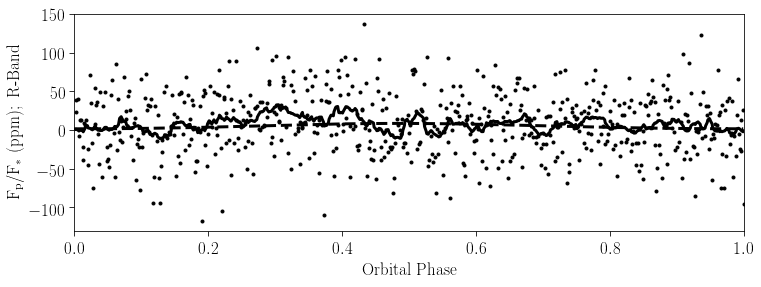

In [6]:
eppe.plot_lightcurve(stokesCurves[i], filt, fstars[i], stokesCurves_ideal[i], highPassSize, lines=True)

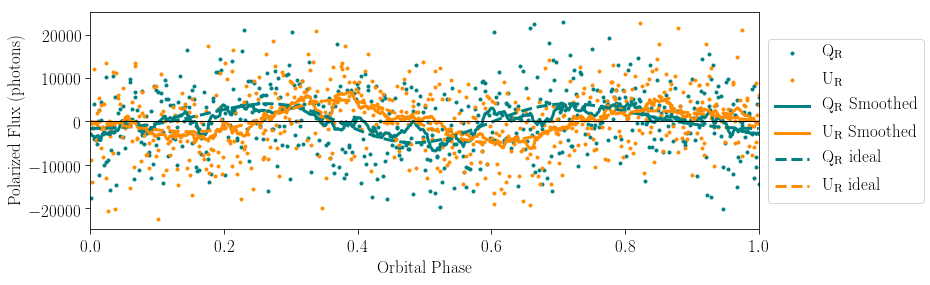

In [7]:
eppe.plot_QU(stokesCurves[i], filt, stokesCurves_ideal[i], highPassSize, lines=True)

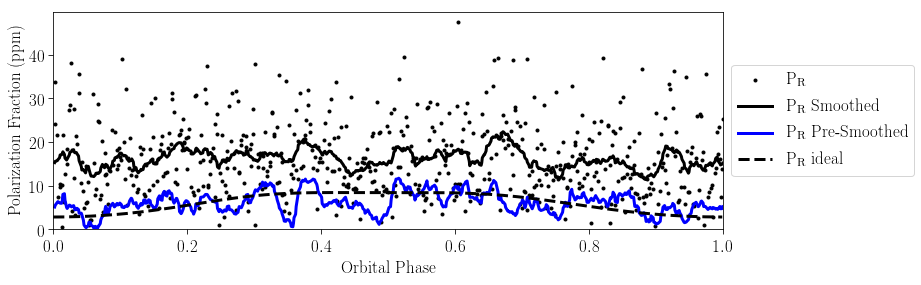

In [8]:
eppe.plot_P(stokesCurves[i], filt, fstars[i], stokesCurves_ideal[i], highPassSize, lines=True)

In [9]:
import george

In [10]:
stokesCurves_ideal = mission.observe_polarization(1, systems.catalogue['per'][i]*24., photonNoise=False, pStart=0)

In [11]:
gamma = 100
per = 0.4

kernel = george.kernels.ExpSine2Kernel(gamma, np.log(per))

x = np.linspace(0, per, 100)
y = 1+0.1*np.cos(x/per*2*np.pi)+np.random.normal(loc=0, scale=0.1, size=len(x))

gp = george.GP(kernel)
gp.compute(x)

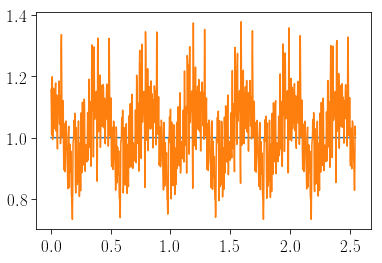

In [12]:
plt.plot(stokesCurves_ideal[i][-2], stokesCurves_ideal[i][0]/np.median(stokesCurves_ideal[i][0]))
x = np.linspace(0, systems.catalogue['per'][i], 1000)
plt.plot(x, gp.predict(y, x)[0])
plt.show()